In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_input = pd.read_csv("online_shoppers_intention.csv")  # change this to your csv file

In [3]:
month_dict = { 'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
               'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12 }

In [4]:
df_input['Month'] = df_input['Month'].map(month_dict)

In [5]:
dependent_variable = "Revenue"

In [6]:
dummies = pd.get_dummies(df_input['VisitorType'])

In [7]:
dummies.rename(columns = {'New_Visitor':'V_type_New_Visitor' , 'Other':'V_type_Other' , 'Returning_Visitor':'V_type_Returning_Visitor'} , inplace = True)

In [8]:
df = pd.concat([df_input, dummies], axis=1)

In [9]:
df = df.drop('VisitorType' , axis =1)

In [10]:
df = df.replace({True: 1, False: 0})
df = df.dropna()
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,V_type_New_Visitor,V_type_Other,V_type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2.0,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2.0,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2.0,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2.0,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2.0,3,3,1,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12.0,4,6,1,1,1,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11.0,3,2,1,8,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11.0,3,2,1,13,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11.0,2,2,3,11,0,0,0,0,1


In [11]:
# Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12042.0,2.316143,3.318533,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12042.0,81.337323,178.016727,0.0,0.000000,8.000000,94.000000,3398.750000
Informational,12042.0,0.502159,1.268348,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12042.0,34.807743,141.925059,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12042.0,31.627803,44.292058,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12042.0,1194.300626,1908.229687,0.0,186.000000,601.767424,1464.364905,63973.522230
BounceRates,12042.0,0.021883,0.048171,0.0,0.000000,0.003030,0.016667,0.200000
ExitRates,12042.0,0.042710,0.048331,0.0,0.014286,0.025000,0.050000,0.200000
PageValues,12042.0,5.948996,18.679686,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12042.0,0.062897,0.201052,0.0,0.000000,0.000000,0.000000,1.000000


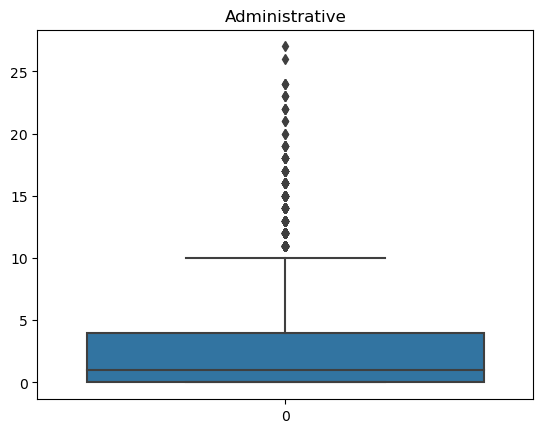

<Figure size 2000x2000 with 0 Axes>

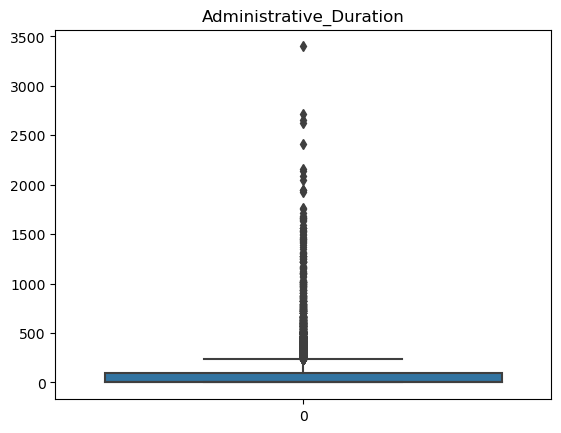

<Figure size 2000x2000 with 0 Axes>

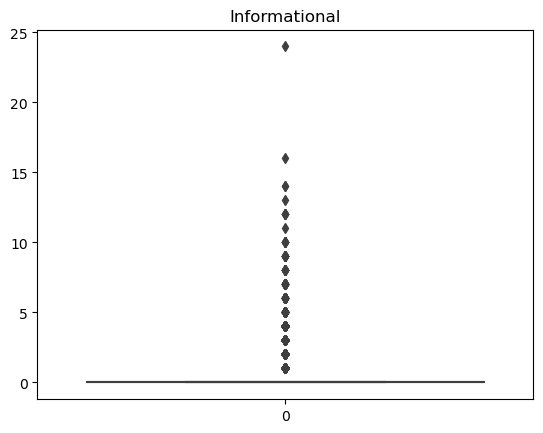

<Figure size 2000x2000 with 0 Axes>

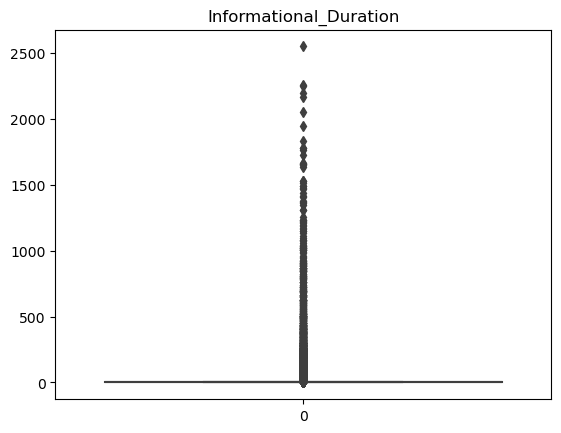

<Figure size 2000x2000 with 0 Axes>

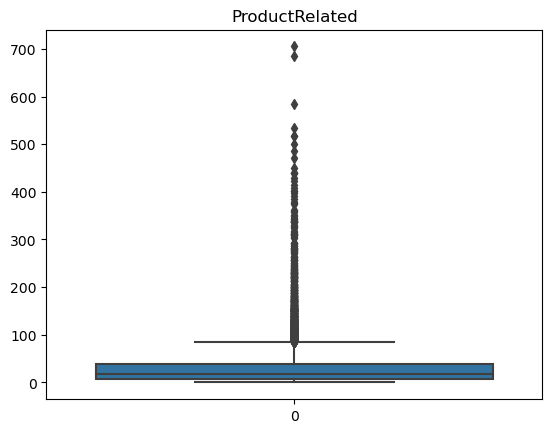

<Figure size 2000x2000 with 0 Axes>

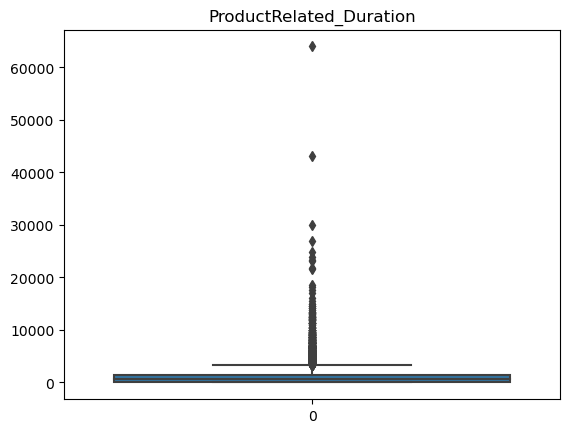

<Figure size 2000x2000 with 0 Axes>

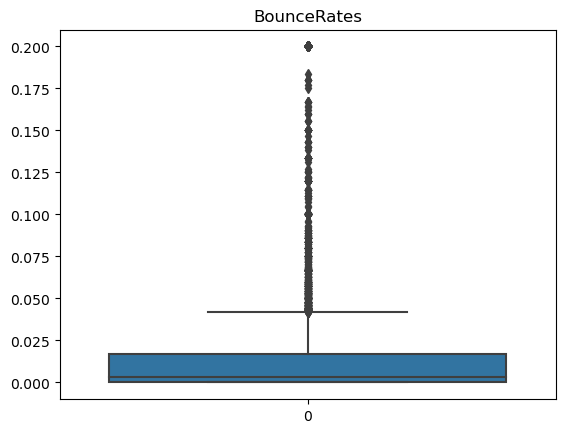

<Figure size 2000x2000 with 0 Axes>

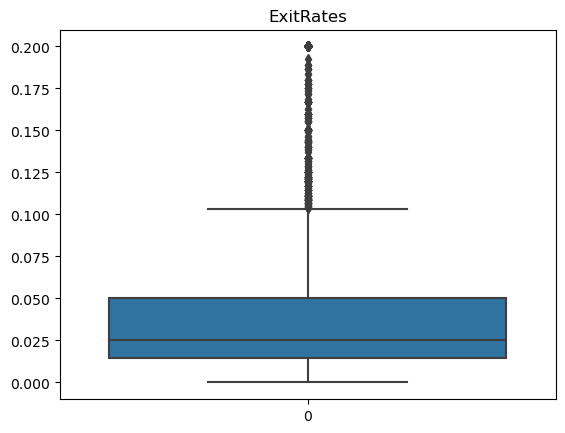

<Figure size 2000x2000 with 0 Axes>

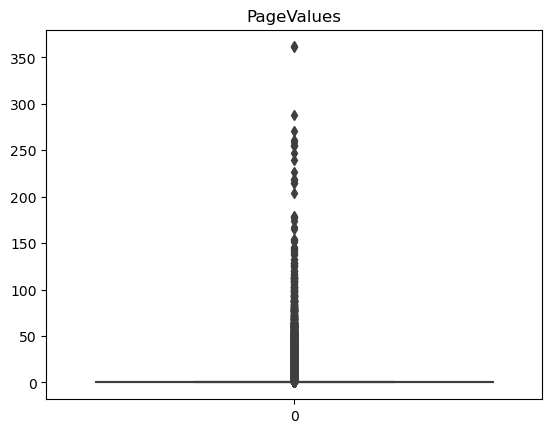

<Figure size 2000x2000 with 0 Axes>

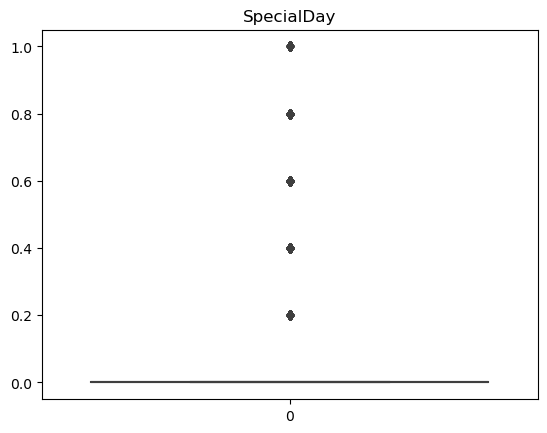

<Figure size 2000x2000 with 0 Axes>

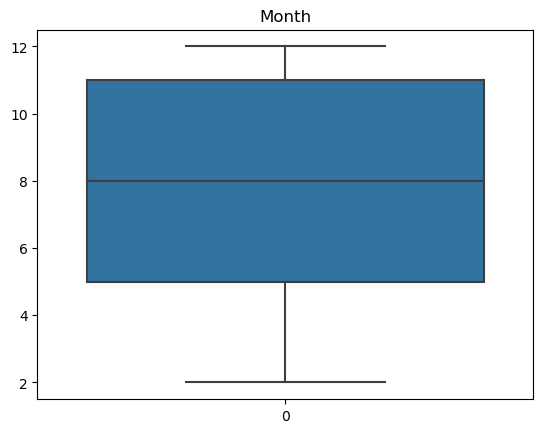

<Figure size 2000x2000 with 0 Axes>

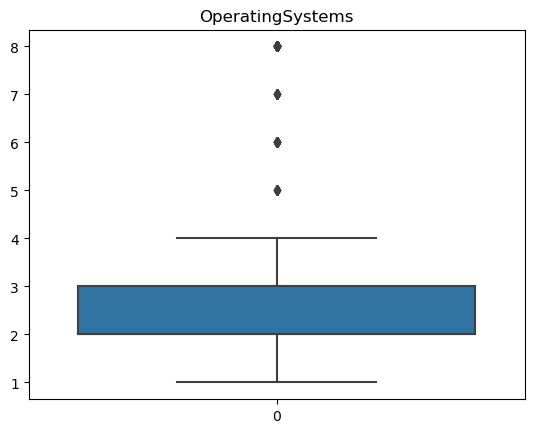

<Figure size 2000x2000 with 0 Axes>

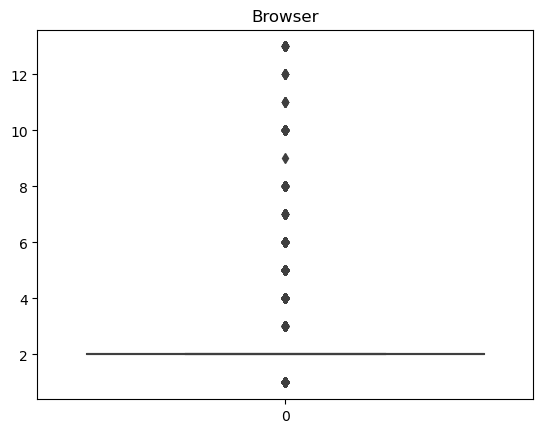

<Figure size 2000x2000 with 0 Axes>

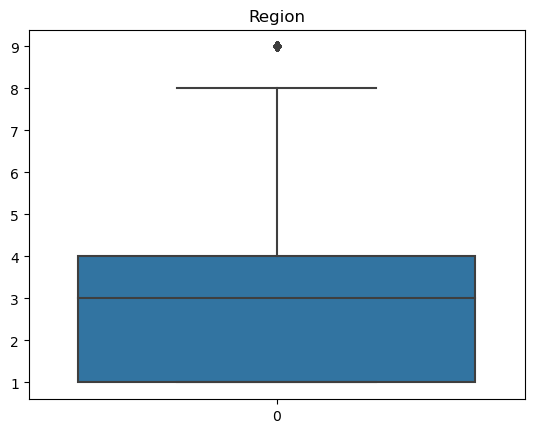

<Figure size 2000x2000 with 0 Axes>

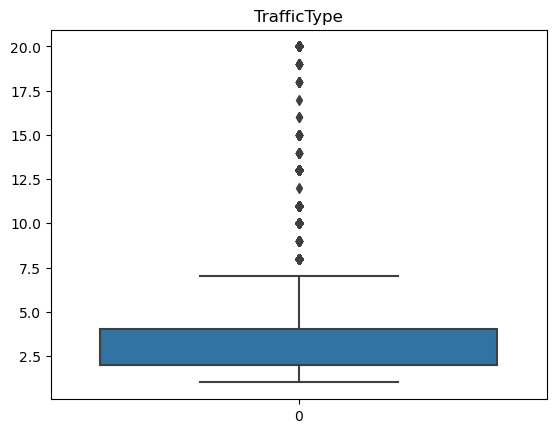

<Figure size 2000x2000 with 0 Axes>

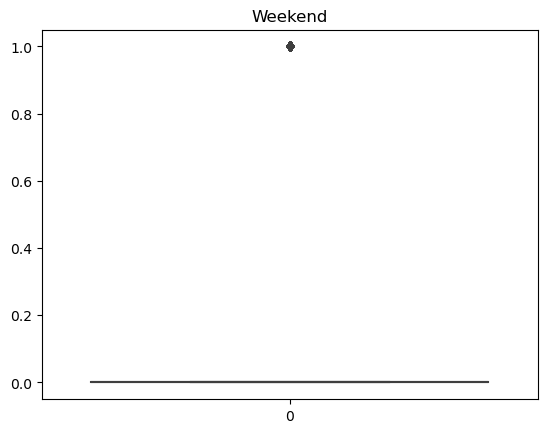

<Figure size 2000x2000 with 0 Axes>

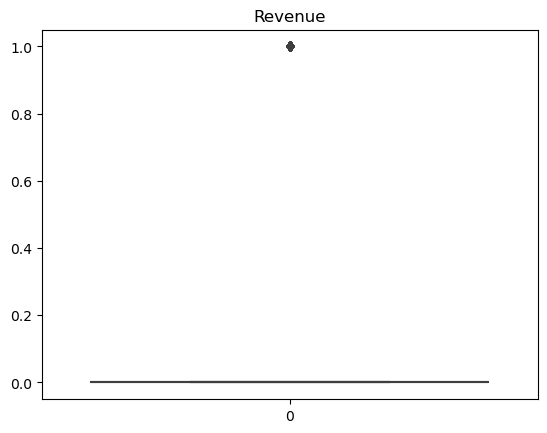

<Figure size 2000x2000 with 0 Axes>

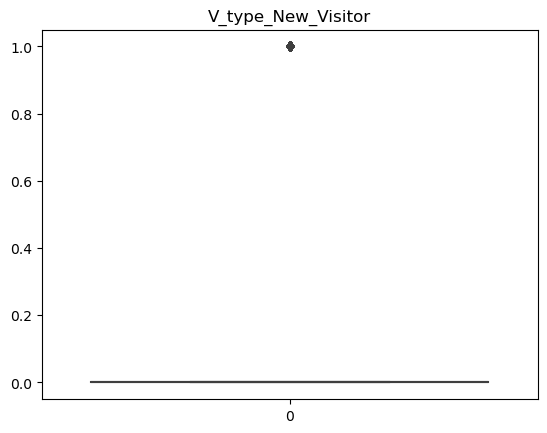

<Figure size 2000x2000 with 0 Axes>

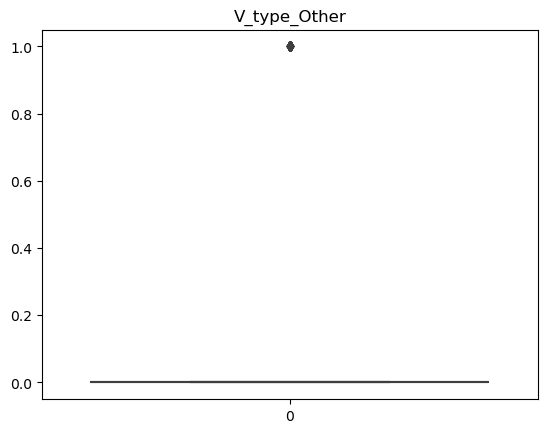

<Figure size 2000x2000 with 0 Axes>

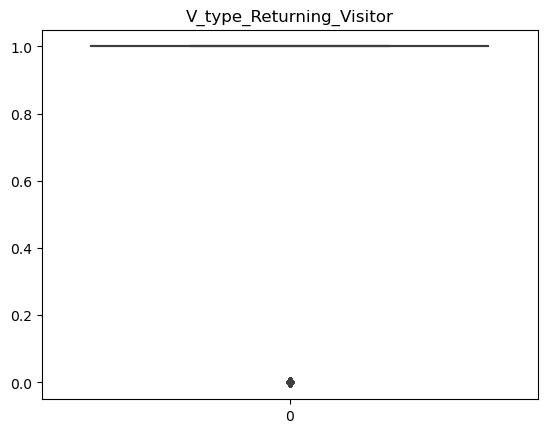

<Figure size 2000x2000 with 0 Axes>

In [14]:
# Statistic boxplot
for i, column in enumerate(df.columns):
    sns.boxplot(data=df[column])
    plt.title(column)
    plt.figure(figsize=(20,20))
    plt.tight_layout()
    plt.show()

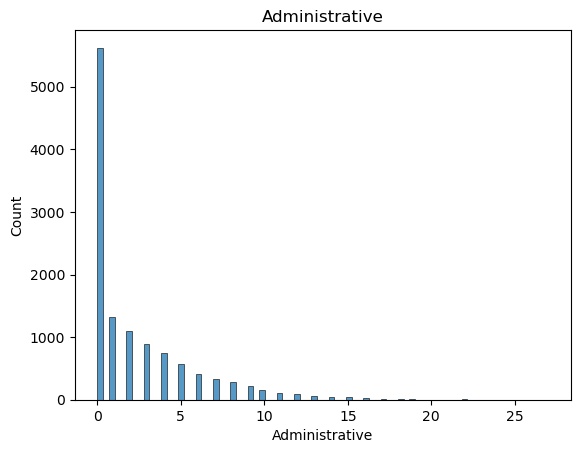

<Figure size 2000x2000 with 0 Axes>

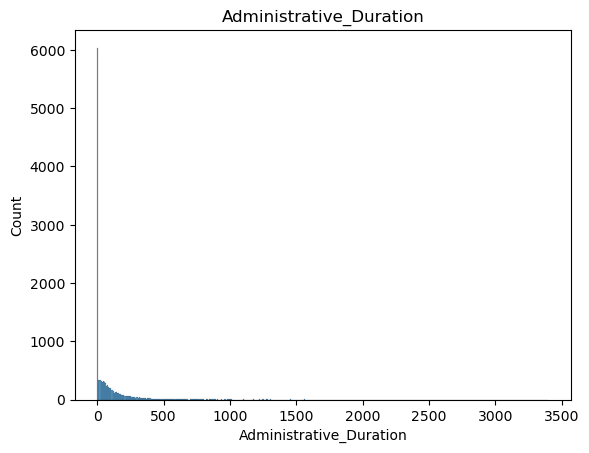

<Figure size 2000x2000 with 0 Axes>

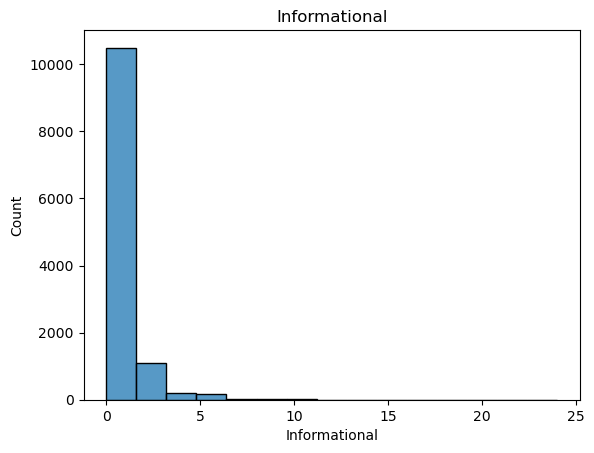

<Figure size 2000x2000 with 0 Axes>

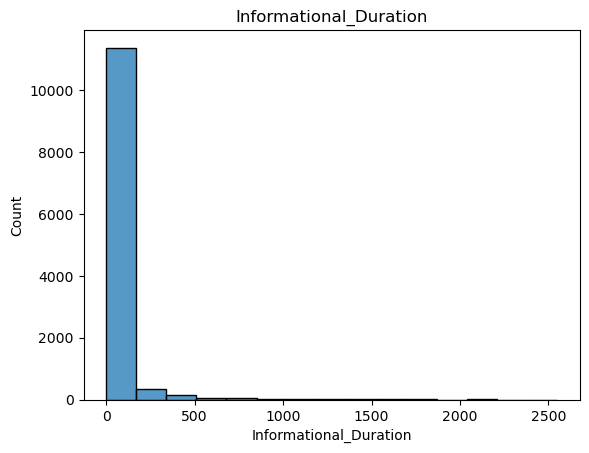

<Figure size 2000x2000 with 0 Axes>

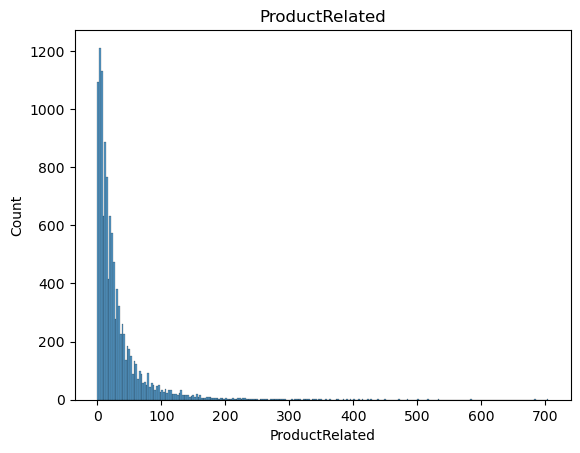

<Figure size 2000x2000 with 0 Axes>

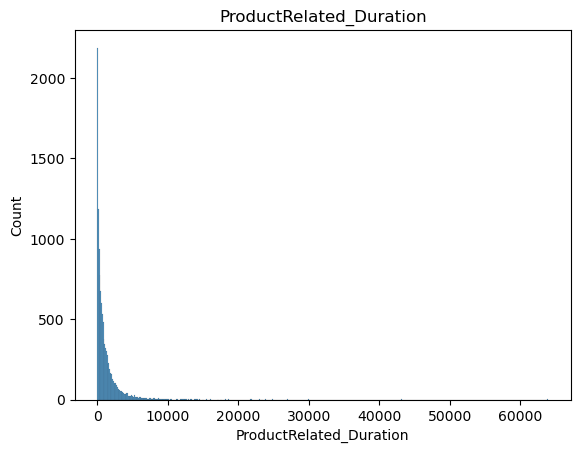

<Figure size 2000x2000 with 0 Axes>

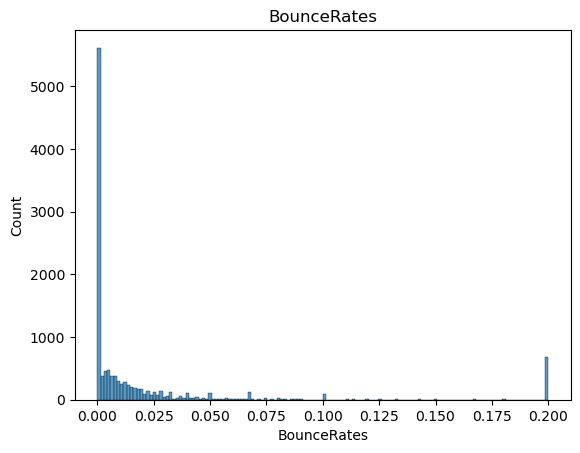

<Figure size 2000x2000 with 0 Axes>

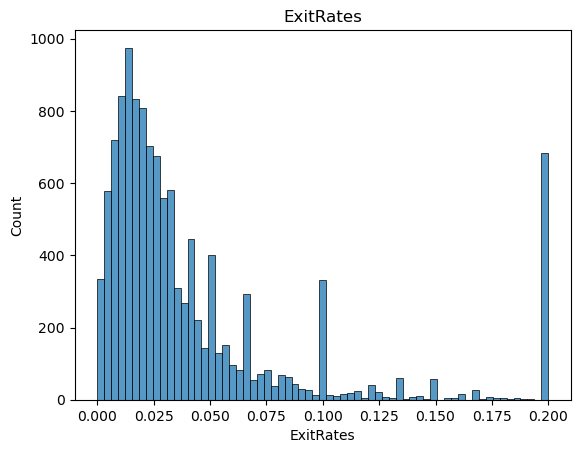

<Figure size 2000x2000 with 0 Axes>

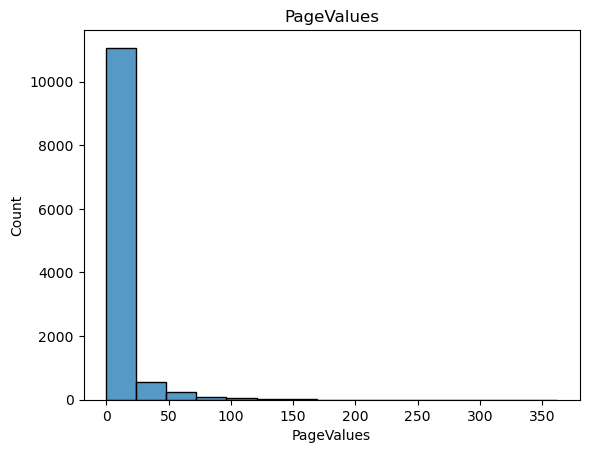

<Figure size 2000x2000 with 0 Axes>

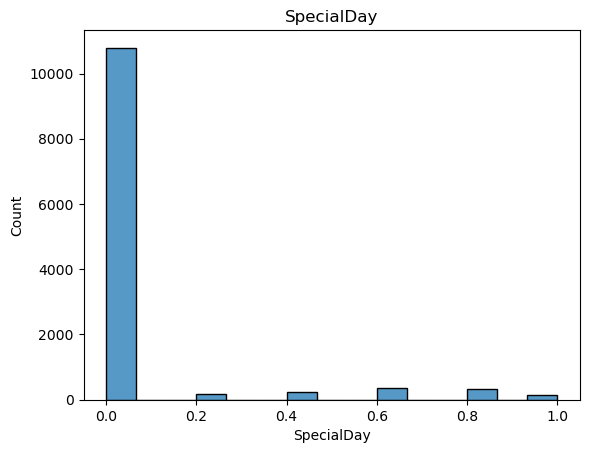

<Figure size 2000x2000 with 0 Axes>

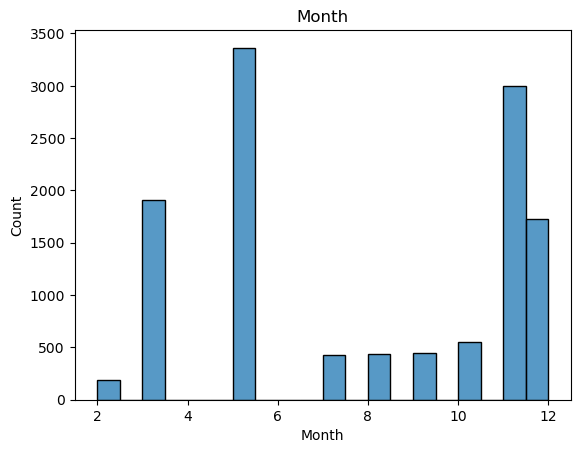

<Figure size 2000x2000 with 0 Axes>

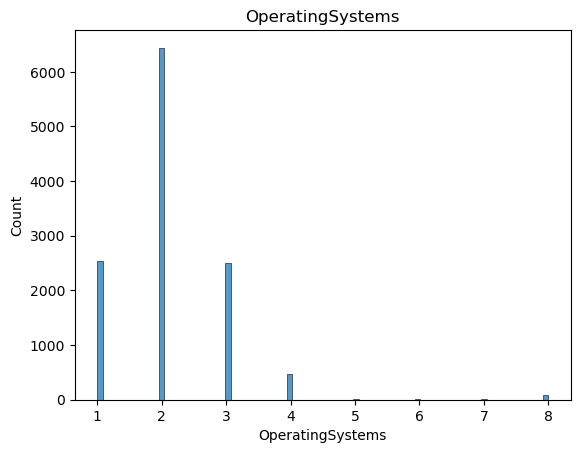

<Figure size 2000x2000 with 0 Axes>

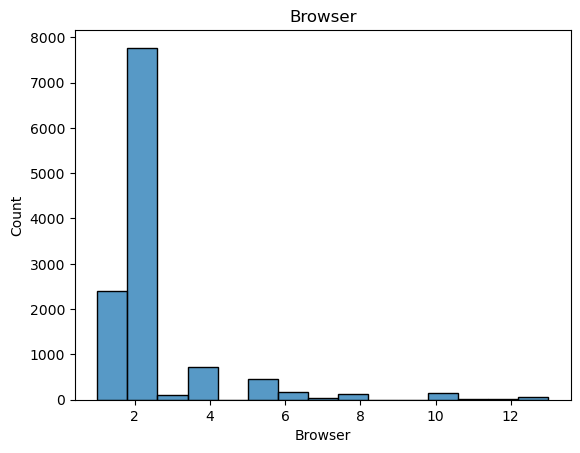

<Figure size 2000x2000 with 0 Axes>

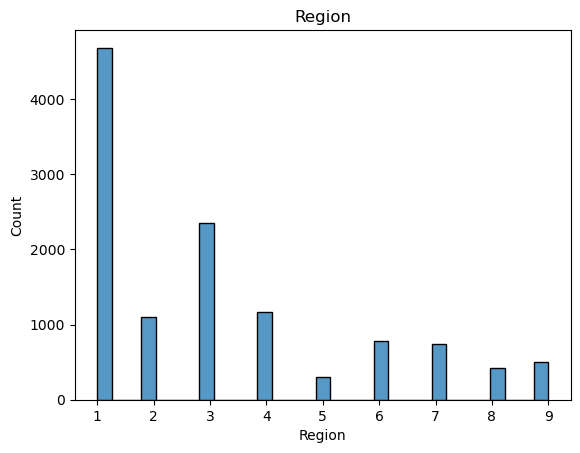

<Figure size 2000x2000 with 0 Axes>

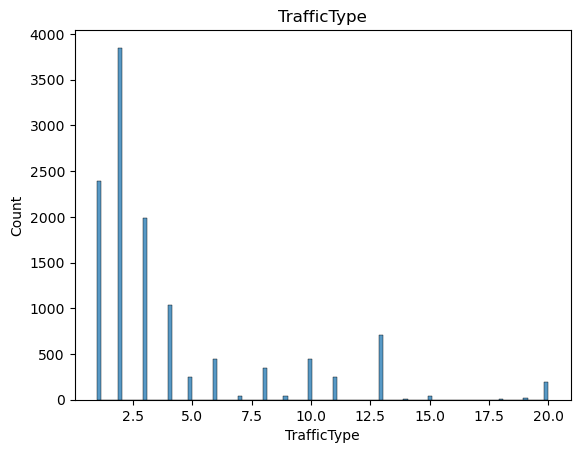

<Figure size 2000x2000 with 0 Axes>

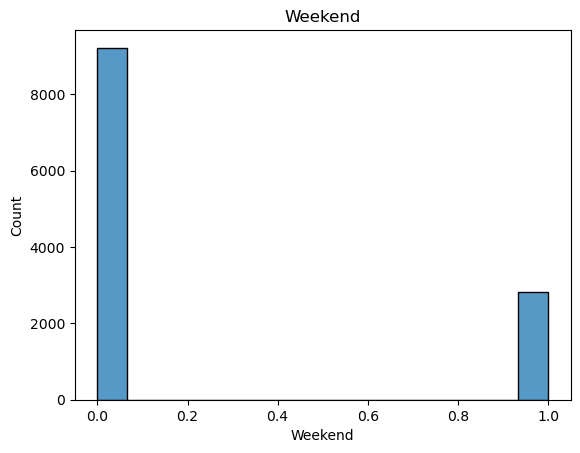

<Figure size 2000x2000 with 0 Axes>

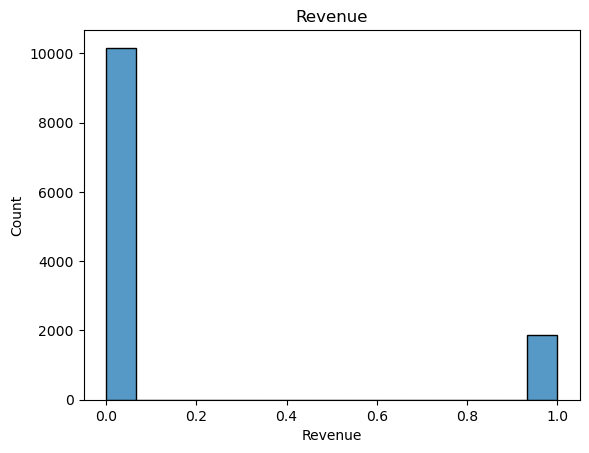

<Figure size 2000x2000 with 0 Axes>

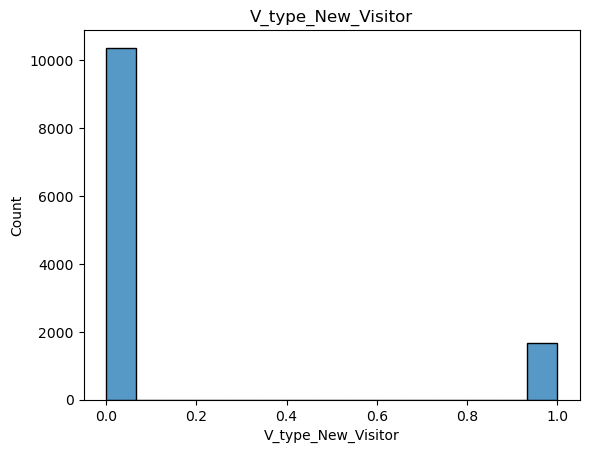

<Figure size 2000x2000 with 0 Axes>

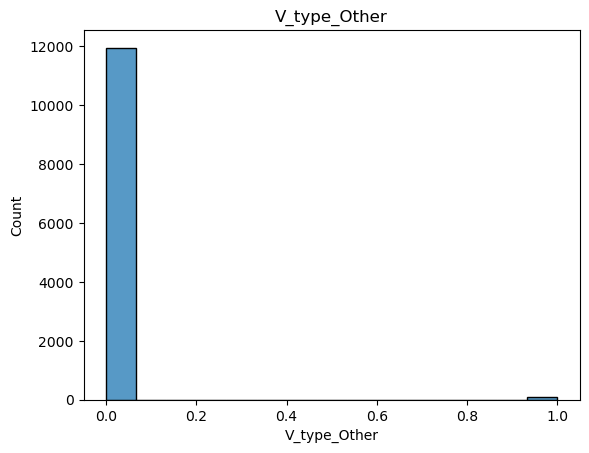

<Figure size 2000x2000 with 0 Axes>

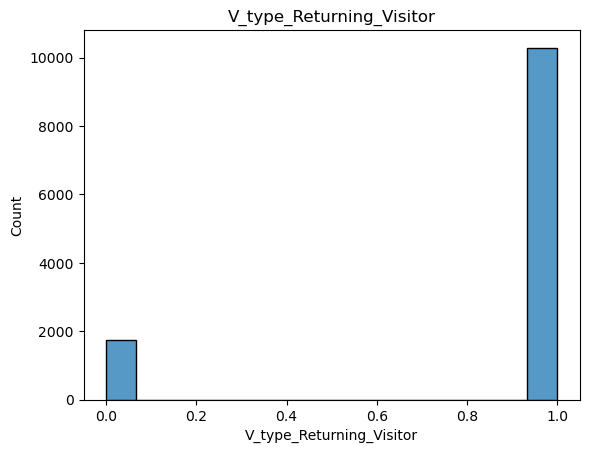

<Figure size 2000x2000 with 0 Axes>

In [15]:
# Histogram to see distribution of every variable
for i, column in enumerate(df.columns):
    sns.histplot(data=df[column])
    plt.title(column)
    plt.figure(figsize=(20,20))
    plt.tight_layout()
    plt.show()

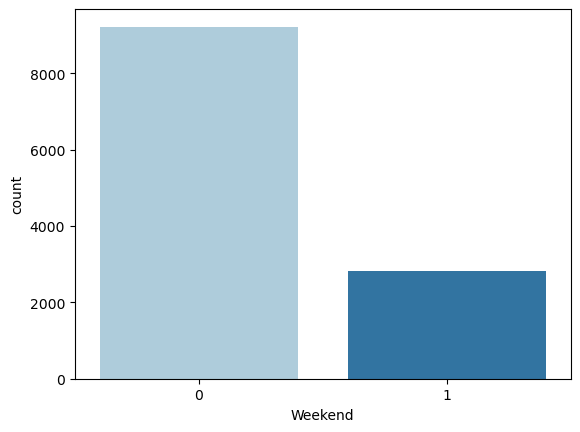

In [29]:
sns.countplot(data=df, x='Weekend', palette='Paired')
plt.title('Weekend')
plt.show()

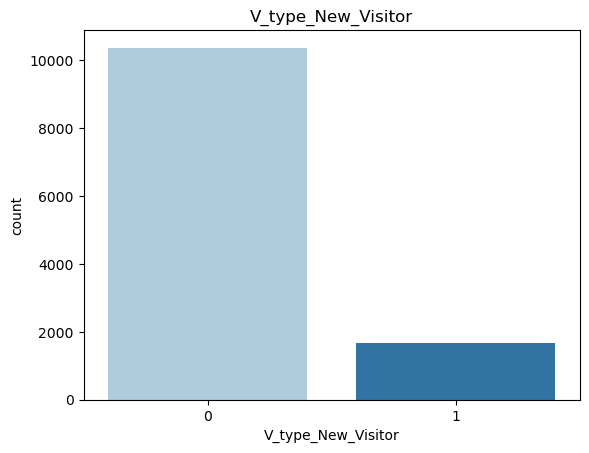

In [30]:
sns.countplot(data=df, x='V_type_New_Visitor', palette='Paired')
plt.title('V_type_New_Visitor')
plt.show()

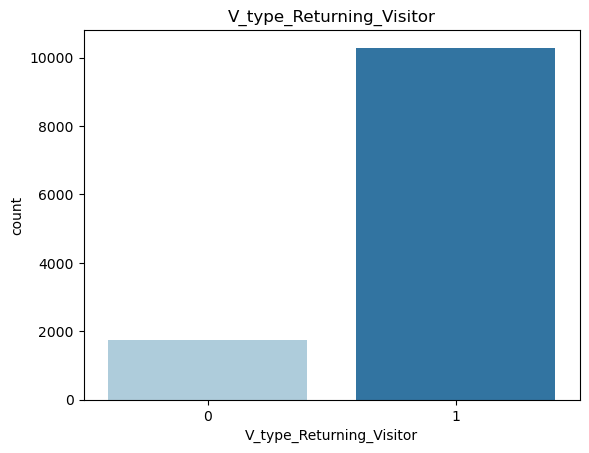

In [31]:
sns.countplot(data=df, x='V_type_Returning_Visitor', palette='Paired')
plt.title('V_type_Returning_Visitor')
plt.show()

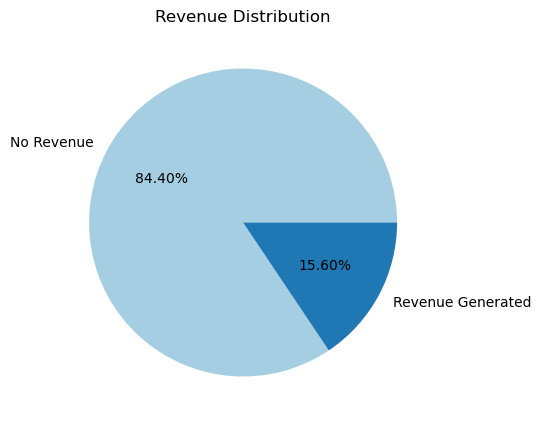

In [16]:
# Revenue Distribution
plt.figure(figsize=(5, 5))

plt.pie(
    df['Revenue'].value_counts(),
    autopct='%.2f%%',
    labels=["No Revenue", "Revenue Generated"],
    colors=sns.color_palette('Paired')
)

plt.title("Revenue Distribution")
plt.show()

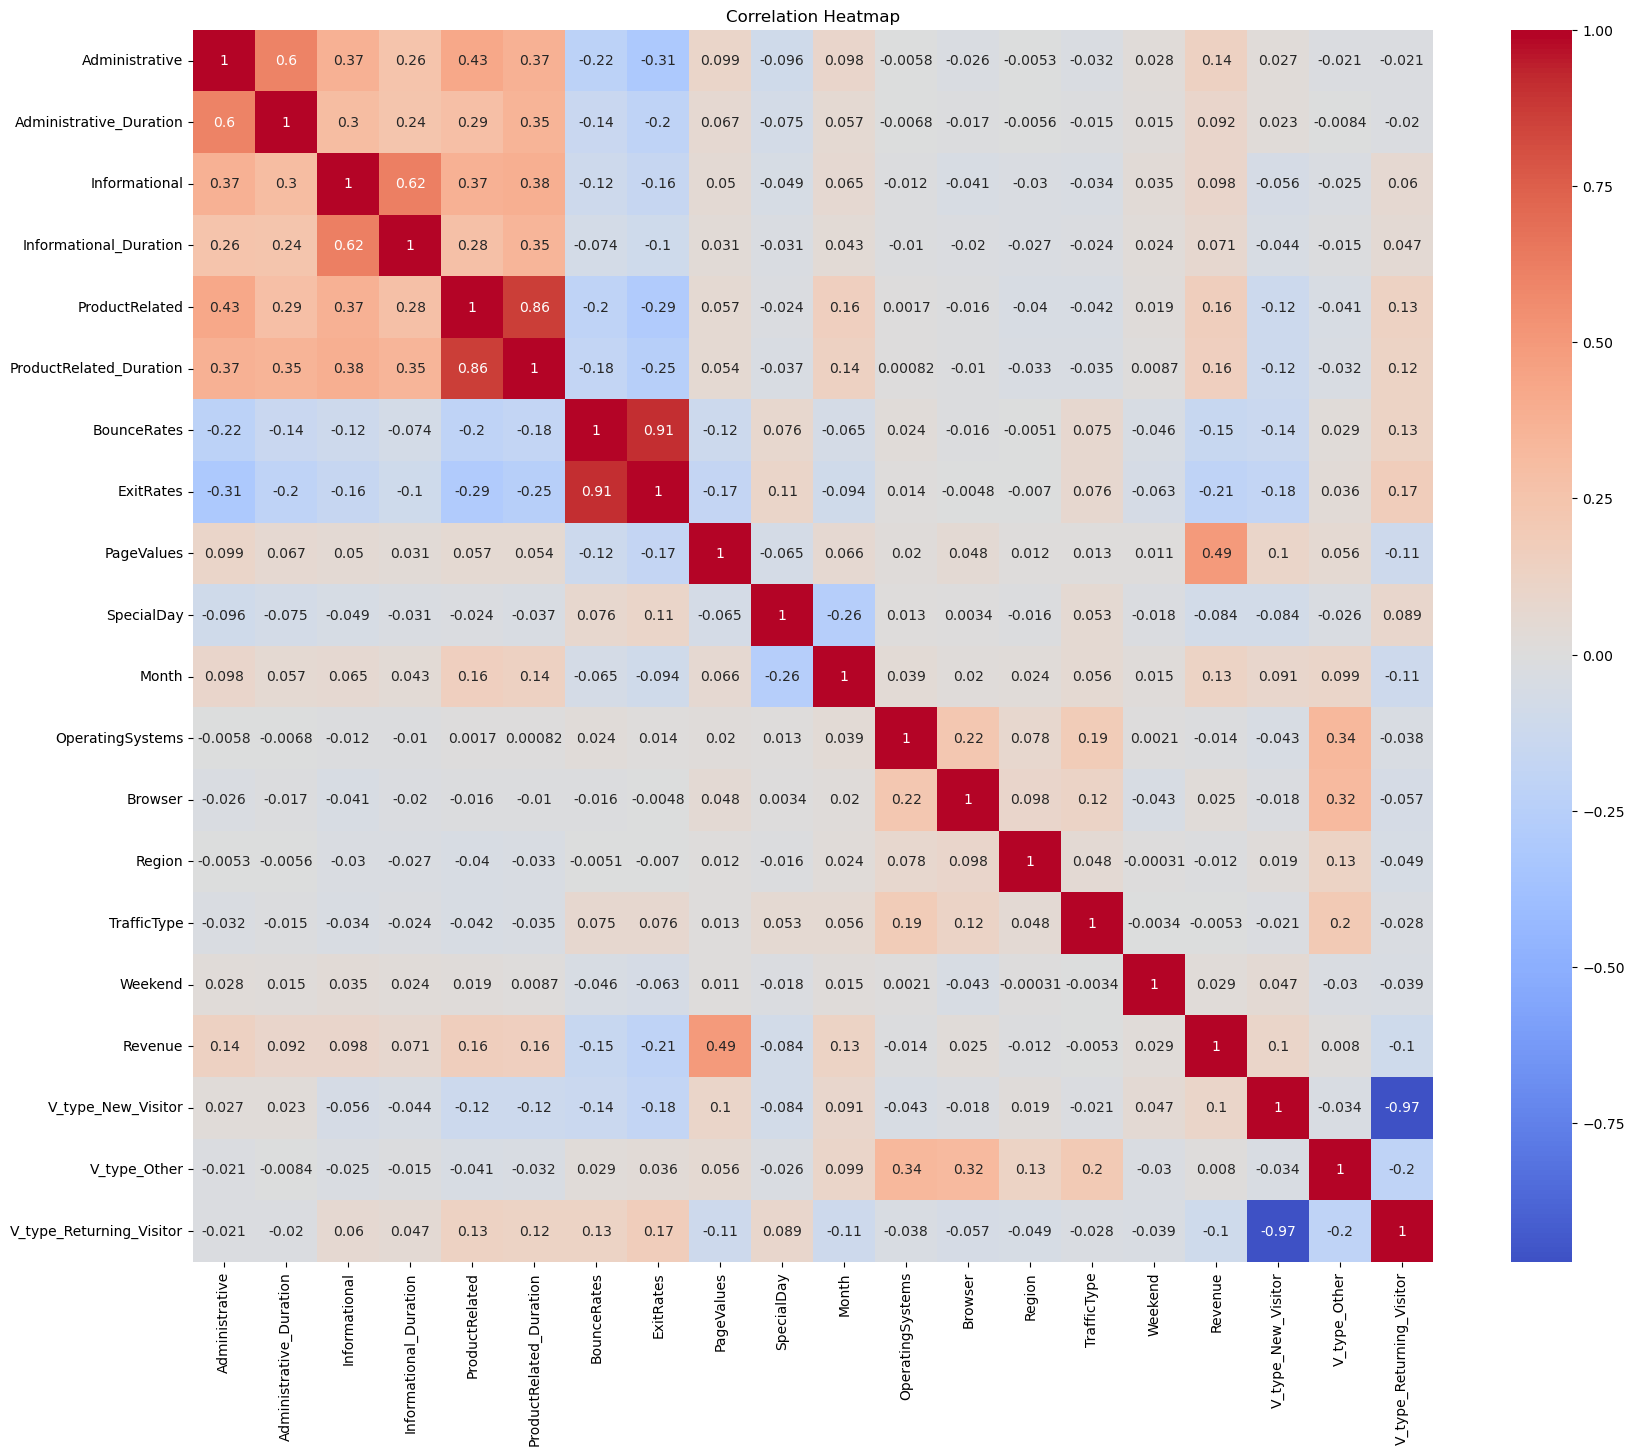

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,V_type_New_Visitor,V_type_Other,V_type_Returning_Visitor
Administrative,1.000000,0.601152,0.374898,0.255416,0.426721,0.370027,-0.221638,-0.314987,0.099494,-0.096200,0.098092,-0.005767,-0.025965,-0.005281,-0.031729,0.027543,0.140193,0.026827,-0.020914,-0.021339
Administrative_Duration,0.601152,1.000000,0.302092,0.237530,0.288062,0.354745,-0.142462,-0.203954,0.067108,-0.074655,0.056891,-0.006846,-0.016547,-0.005563,-0.015146,0.015226,0.091670,0.022626,-0.008426,-0.020174
Informational,0.374898,0.302092,1.000000,0.619308,0.373418,0.384241,-0.115450,-0.162996,0.050175,-0.048570,0.065079,-0.012316,-0.040982,-0.029808,-0.033800,0.035465,0.098053,-0.055705,-0.024530,0.060367
Informational_Duration,0.255416,0.237530,0.619308,1.000000,0.280922,0.347649,-0.073508,-0.104544,0.031184,-0.031458,0.043469,-0.010347,-0.020175,-0.027056,-0.024150,0.024049,0.070591,-0.044135,-0.015160,0.046819
ProductRelated,0.426721,0.288062,0.373418,0.280922,1.000000,0.862128,-0.203439,-0.291718,0.057118,-0.023639,0.160138,0.001725,-0.016447,-0.039992,-0.041569,0.018894,0.162977,-0.122827,-0.040973,0.130008
ProductRelated_Duration,0.370027,0.354745,0.384241,0.347649,0.862128,1.000000,-0.183500,-0.251074,0.053714,-0.036886,0.140064,0.000816,-0.010473,-0.033279,-0.034778,0.008671,0.155991,-0.117373,-0.032141,0.122579
BounceRates,-0.221638,-0.142462,-0.115450,-0.073508,-0.203439,-0.183500,1.000000,0.912086,-0.118672,0.076141,-0.064823,0.023624,-0.016260,-0.005135,0.074619,-0.045870,-0.149595,-0.139052,0.028696,0.129442
ExitRates,-0.314987,-0.203954,-0.162996,-0.104544,-0.291718,-0.251074,0.912086,1.000000,-0.173802,0.106492,-0.093698,0.014069,-0.004847,-0.007048,0.075742,-0.062865,-0.206554,-0.182655,0.035734,0.170495
PageValues,0.099494,0.067108,0.050175,0.031184,0.057118,0.053714,-0.118672,-0.173802,1.000000,-0.064987,0.066204,0.020314,0.047523,0.012446,0.012772,0.010712,0.494279,0.103007,0.055906,-0.114120
SpecialDay,-0.096200,-0.074655,-0.048570,-0.031458,-0.023639,-0.036886,0.076141,0.106492,-0.064987,1.000000,-0.261537,0.012859,0.003361,-0.016164,0.053315,-0.018170,-0.084210,-0.084337,-0.026221,0.088816


In [17]:
# Correlation Matrix and Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

correlation_matrix

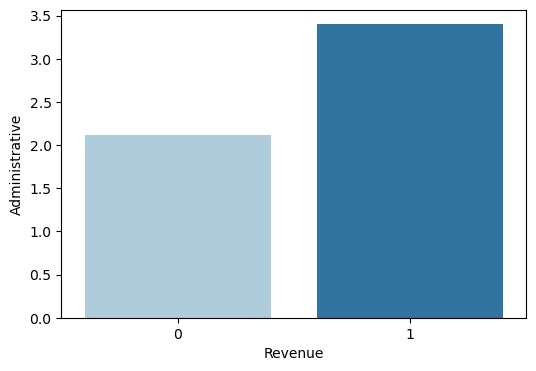

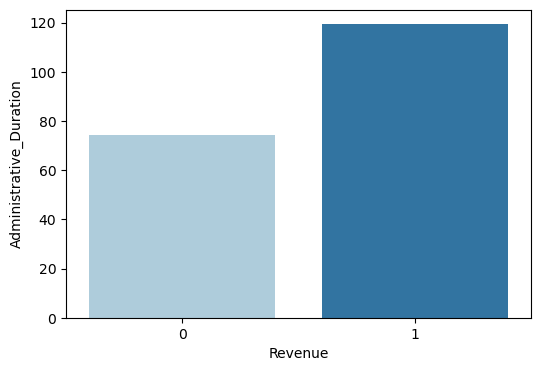

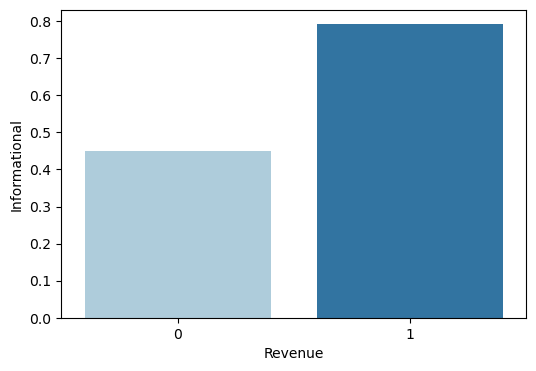

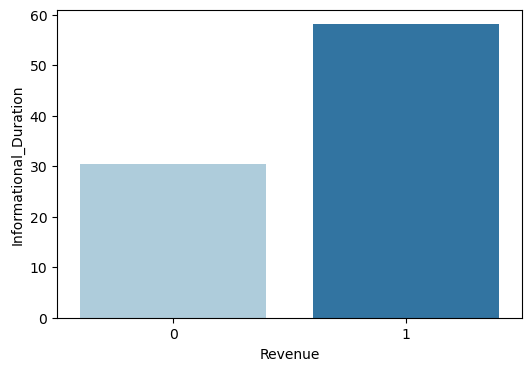

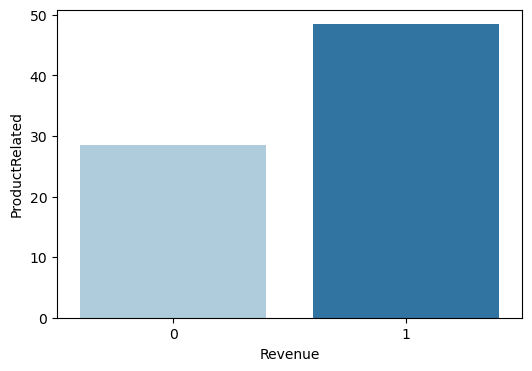

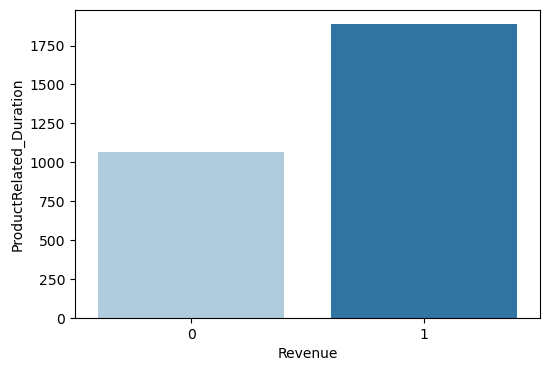

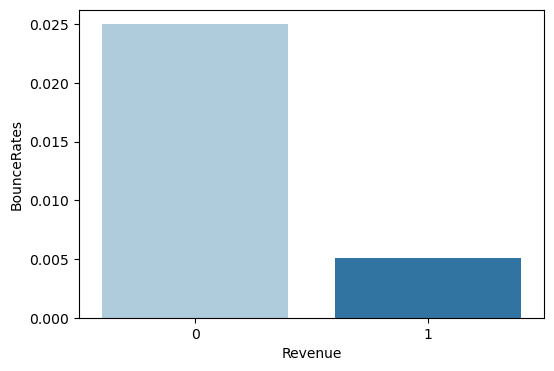

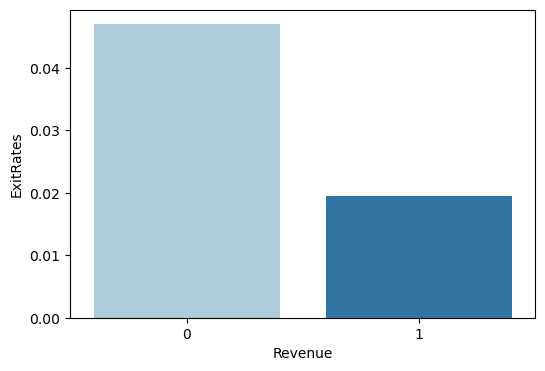

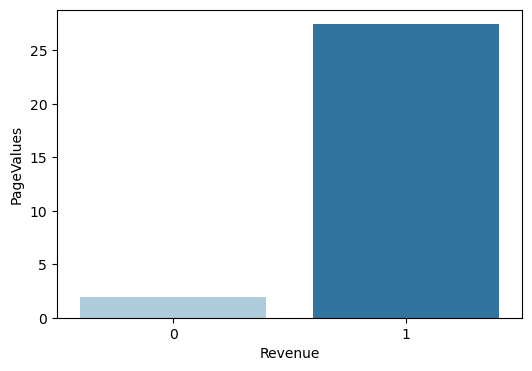

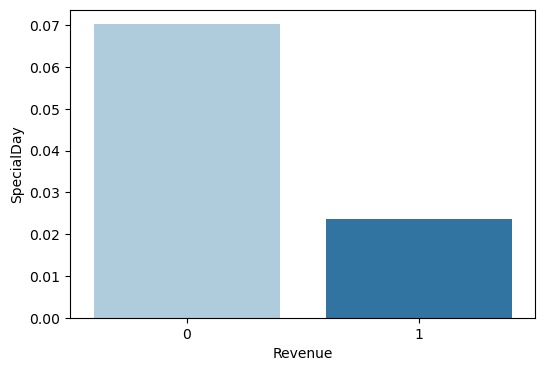

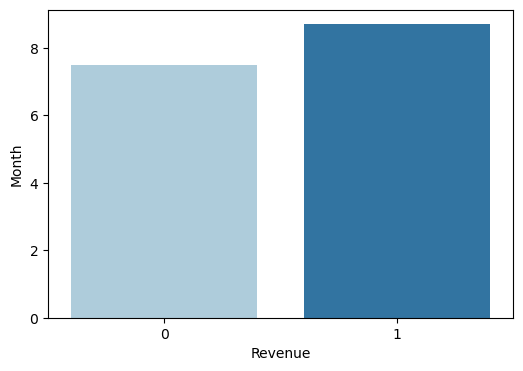

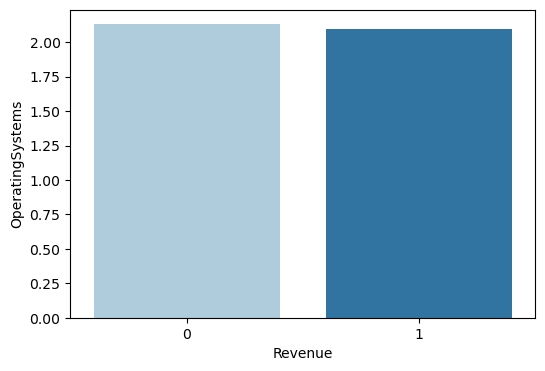

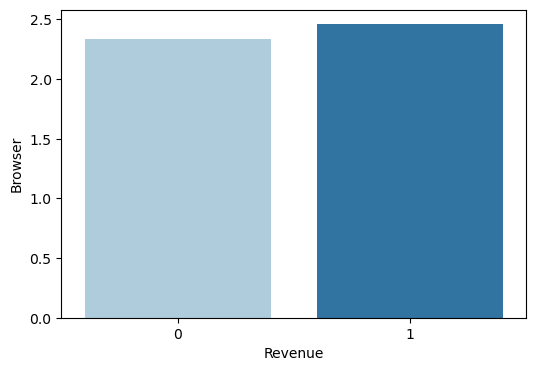

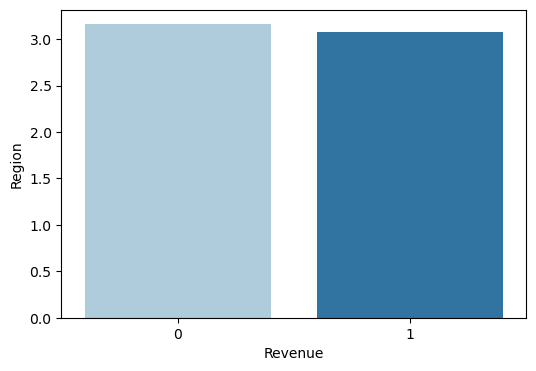

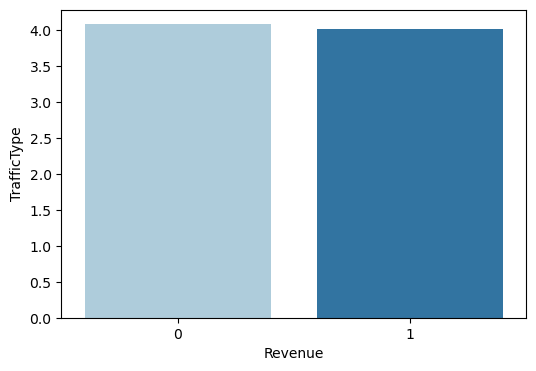

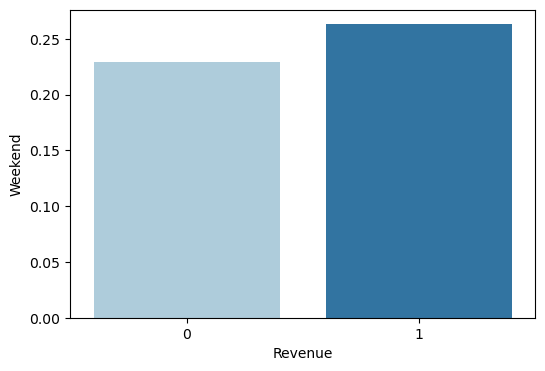

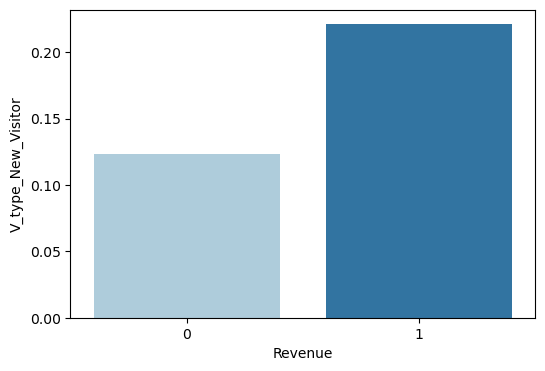

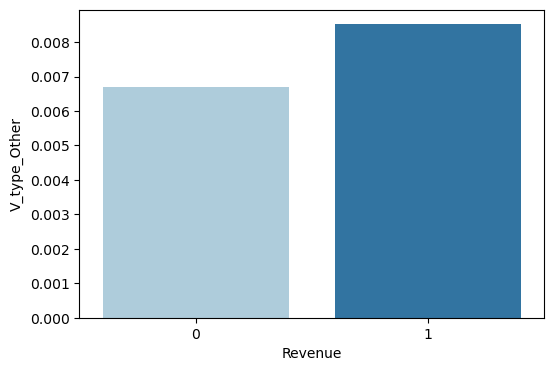

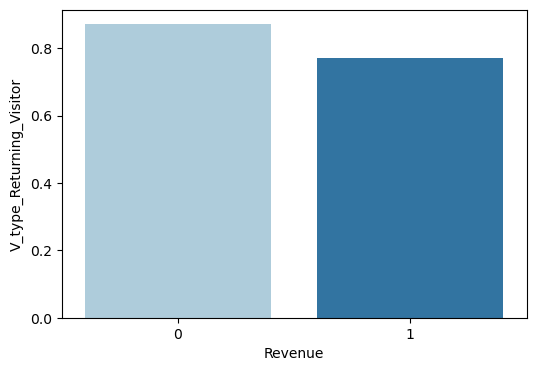

In [18]:
# Barplots that help to understand the average values of different variables across 2 revenue groups and identify any trends or patterns in the data.

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

groupby_mean = df.groupby(by='Revenue').mean()

for index,i in enumerate(groupby_mean.columns, start=1):
    plt.figure(figsize=(6,4))
    sns.barplot(data=groupby_mean, x=groupby_mean.index, y=groupby_mean[i], palette='Paired')
    plt.show()

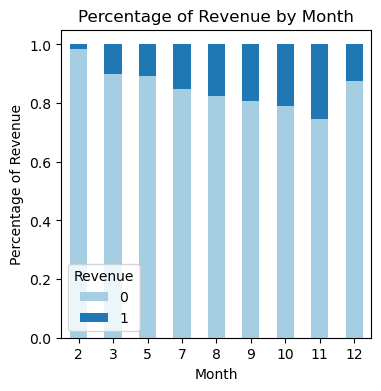

In [19]:
# Show which month has a higher percentage of revenue
revenue=pd.crosstab(df['Month'],df['Revenue']) 

revenue_percentage = revenue.div(revenue.sum(1).astype(float), axis=0)

revenue_percentage.index = revenue_percentage.index.astype(int)

revenue_percentage.plot(kind="bar", stacked=True, figsize=(4, 4), color=sns.color_palette('Paired'))

plt.title("Percentage of Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Percentage of Revenue")
plt.xticks(rotation=0)

plt.show()

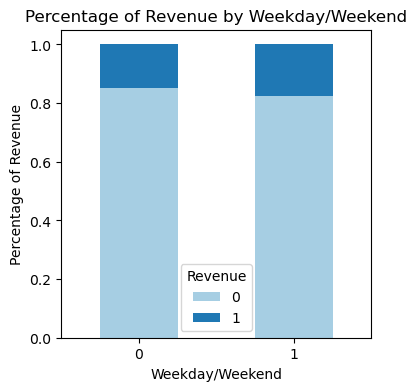

In [32]:
# Show whether weekend has a higher percentage of revenue
revenue_1 = pd.crosstab(df['Weekend'],df['Revenue']) 

revenue_percentage_1 = revenue_1.div(revenue_1.sum(1).astype(float), axis=0)

revenue_percentage_1.index = revenue_percentage_1.index.astype(int)

revenue_percentage_1.plot(kind="bar", stacked=True, figsize=(4, 4), color=sns.color_palette('Paired'))

plt.title("Percentage of Revenue by Weekday/Weekend")
plt.xlabel("Weekday/Weekend")
plt.ylabel("Percentage of Revenue")
plt.xticks(rotation=0)

plt.show()

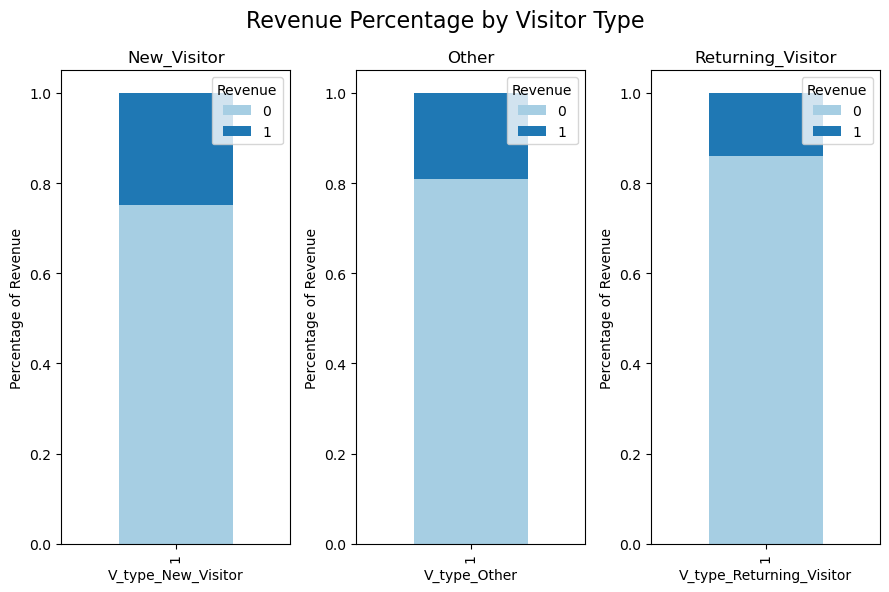

In [23]:
# Show the percentage of revenue contributed by each type of customer

# List of visitor types
visitor_types = ['V_type_New_Visitor', 'V_type_Other', 'V_type_Returning_Visitor']

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(9, 6))

# Loop through each visitor type and plot the stacked bar chart
for i, visitor_type in enumerate(visitor_types):
    visitortype = pd.crosstab(df[visitor_type], df['Revenue'])
    visitortype_percentage = visitortype.div(visitortype.sum(1).astype(float), axis=0)
    visitortype_percentage = visitortype_percentage.iloc[1:, :]
    visitortype_percentage.plot(kind="bar", stacked=True, ax=axes[i], color=sns.color_palette('Paired'))
    axes[i].set_title(visitor_type.replace('V_type_', ''))  # Set subplot title (removing 'V_type_')
    axes[i].set_ylabel('Percentage of Revenue')
    
# Set the common title for the entire plot
fig.suptitle('Revenue Percentage by Visitor Type', fontsize=16)


# Adjust layout to prevent overlapping of titles
plt.tight_layout()

# Show the combined plot
plt.show()
